In [39]:
# First of all, let's load all libraries
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table

# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

np.set_printoptions(precision=5)
%matplotlib inline
pd.options.display.max_columns=1000

In [40]:
# Load data
df = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=['spam', 'text'])

# set categorical values of spam to 0 or 1
df['spam'] = df['spam'] == 'spam' # makes True/False instead of "spam" and "ham"
df['spam'] = df['spam'].astype(int)  # number values instead of boolean value

# Adding new feature 'length'
L = []
for i in df.text:
    L.append(len(i))
df['length'] = L
df.head()


,spam,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
len(df.text)

5572

In [42]:
# Add second feature to our DataFrame.
words = df.copy()
num_words = []
for i in range(len(words.text)):
    value = words['text'][i].split(' ')
    num_words.append(len(value))
num_words
df['num_words'] = num_words
df.head()

,spam,text,length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


1) The short messages would be 'ham' messages.  
Let's explore this.

In [43]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

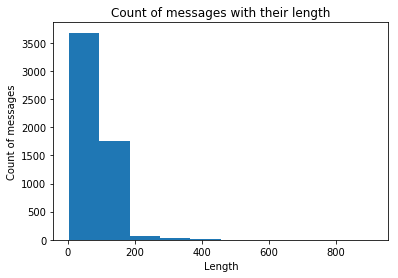

In [44]:
plt.hist(df.length)
plt.xlabel('Length')
plt.ylabel('Count of messages')
plt.title("Count of messages with their length")
plt.show()

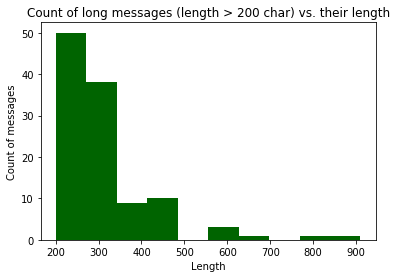

In [45]:
lon = df[df['length'] > 200]
#new["Count of unique 'ham' words"].hist(grid=False, bins=10, color='green')
lon['length'].hist(grid=False, color='darkgreen')
plt.title('Ham words count', pad=20.0)
#plt.hist(lon.length)
plt.xlabel('Length')
plt.ylabel('Count of messages')
plt.title("Count of long messages (length > 200 char) vs. their length")
plt.savefig('long_length_allsms.png')
plt.show()


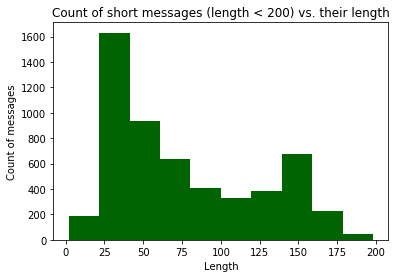

In [46]:
sh = df[df['length'] < 200]
#plt.hist(sh.length)
sh['length'].hist(grid=False, color='darkgreen')
plt.xlabel('Length')
plt.ylabel('Count of messages')
plt.title("Count of short messages (length < 200) vs. their length")
plt.savefig('short_length_allsms.png')
plt.show()

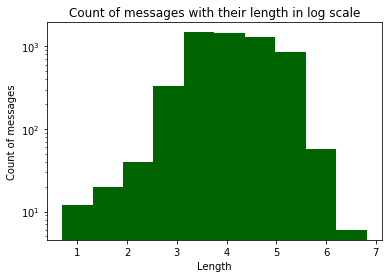

In [47]:
a = df.copy()
a['length'] = np.log(a['length'])
a['length'].hist(grid=False, log=True, color='darkgreen')
#plt.hist(a.length, log=True)
plt.xlabel('Length')
plt.ylabel('Count of messages')
plt.title("Count of messages with their length in log scale")
plt.savefig('length_allsms.png')
plt.show()

Let's consider messages bing short having less than 122 characters.

In [48]:
len_sms = df[df['length'] < 122]
is_spam = len(len_sms.loc[len_sms['spam'] == 1])
print('''Number short sms spam:''', is_spam, 'from 747 spam messages')
print('Spam ratio (short spam/all spam messages):', is_spam/747)
is_ham = len(len_sms.loc[len_sms['spam'] == 0])
print('''Number short sms ham:''', is_ham, 'from 4825 ham messages')
print('Ham ratio (short ham/all ham messages):', is_ham/4825)

Number short sms spam: 140 from 747 spam messages
Spam ratio (short spam/all spam messages): 0.18741633199464525
Number short sms ham: 4025 from 4825 ham messages
Ham ratio (short ham/all ham messages): 0.8341968911917098


In [49]:
len_sms.describe()

,spam,length,num_words
count,4165.000000,4165.000000,4165.000000
mean,0.033613,53.040096,10.758944
std,0.180254,27.593437,5.672752
min,0.000000,2.000000,1.000000
25%,0.000000,31.000000,6.000000
50%,0.000000,46.000000,9.000000
75%,0.000000,71.000000,14.000000
max,1.000000,121.000000,29.000000


Let's test our hypothesis, that really short messages are 'ham', as our intuition tells us that there will be messages like "Ok", "See ya", etc. 

In [50]:
shortest = len_sms.nsmallest(50, 'length')
shortest.text.unique()

array(['Ok', 'Yup', '645', 'Ok.', ':) ', 'Ok..', 'Okie', 'U 2.', 'Ok...',
       'G.W.R', 'Y lei?', 'Yup...', 'ALRITE', 'Okie...', 'Where @',
       'Oh ok..', 'Ok lor.', 'Nite...', 'Havent.', ':-) :-)', 'Thanx...',
       'Thank u!', 'Beerage?', 'U too...', 'My phone', "I'm home.",
       'Yup ok...', 'How come?'], dtype=object)

In [51]:
shortest[shortest['length'] < 10].text.unique()

array(['Ok', 'Yup', '645', 'Ok.', ':) ', 'Ok..', 'Okie', 'U 2.', 'Ok...',
       'G.W.R', 'Y lei?', 'Yup...', 'ALRITE', 'Okie...', 'Where @',
       'Oh ok..', 'Ok lor.', 'Nite...', 'Havent.', ':-) :-)', 'Thanx...',
       'Thank u!', 'Beerage?', 'U too...', 'My phone', "I'm home.",
       'Yup ok...', 'How come?'], dtype=object)

In [52]:
# Are all messages 'ham' or is there any 'spam'?
shortest.spam.describe()

count    50.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: spam, dtype: float64

In [53]:
shortest_length = len_sms.copy()
shortest_length.describe()

,spam,length,num_words
count,4165.000000,4165.000000,4165.000000
mean,0.033613,53.040096,10.758944
std,0.180254,27.593437,5.672752
min,0.000000,2.000000,1.000000
25%,0.000000,31.000000,6.000000
50%,0.000000,46.000000,9.000000
75%,0.000000,71.000000,14.000000
max,1.000000,121.000000,29.000000


In [54]:
# Now do the same for big 'length'
len_sms_big = df[df['length'] > 122]
is_spam = len(len_sms_big.loc[len_sms_big['spam'] == 1])
print('''Number long sms spam:''', is_spam)
print('Spam ratio (long spam/all spam messages):', is_spam/747)
is_ham = len(len_sms_big.loc[len_sms_big['spam'] == 0])
print('''Number long sms ham:''', is_ham)
print('Ham ratio (long ham/all ham messages):', is_ham/4825)

Number long sms spam: 602
Spam ratio (long spam/all spam messages): 0.8058902275769746
Number long sms ham: 785
Ham ratio (long ham/all ham messages): 0.16269430051813472


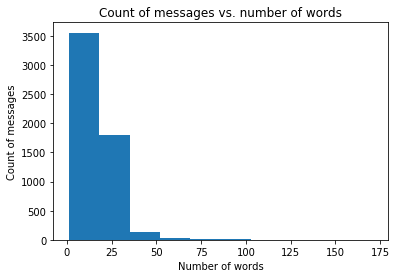

In [55]:
plt.hist(df.num_words)
plt.xlabel('Number of words')
plt.ylabel('Count of messages')
plt.title("Count of messages vs. number of words")
plt.show()

In [56]:
longest = len_sms_big.copy()
longest = longest.nlargest(50, 'length')
longest

,spam,text,length,num_words
1085,0,For me the love should start with attraction.i...,910,171
1863,0,The last thing i ever wanted to do was hurt yo...,790,162
2434,0,Indians r poor but India is not a poor country...,629,119
1579,0,How to Make a girl Happy? It's not at all diff...,611,121
2158,0,Sad story of a Man - Last week was my b'day. M...,588,125
2849,0,Sad story of a Man - Last week was my b'day. M...,588,125
2380,0,"Good evening Sir, hope you are having a nice d...",482,99
3017,0,"&lt;#&gt; is fast approaching. So, Wish u a v...",461,69
1513,0,"Hey sweet, I was wondering when you had a mome...",458,95
2370,0,A Boy loved a gal. He propsd bt she didnt mind...,446,96


In [57]:
longest[longest['length'] > 300].text.unique()

array(["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..",
       "The last thing i ever wanted to do was hurt you. And i didn't think it 

In [58]:
# According to this, messages longer than 2 SMS (more than 300 characters) are 'ham' messages.
len_sms_big[len_sms_big['length'] > 300]

,spam,text,length,num_words
155,0,"You are everywhere dirt, on the floor, the win...",384,80
711,0,Height of Confidence: All the Aeronautics prof...,316,57
838,0,"Sir, I have been late in paying rent for the p...",372,77
1085,0,For me the love should start with attraction.i...,910,171
1360,0,&lt;#&gt; %of pple marry with their lovers... ...,327,66
1385,0,"Storming msg: Wen u lift d phne, u say ""HELLO""...",324,79
1513,0,"Hey sweet, I was wondering when you had a mome...",458,95
1579,0,How to Make a girl Happy? It's not at all diff...,611,121
1586,0,I was wondering if it would be okay for you to...,338,71
1827,0,Dude. What's up. How Teresa. Hope you have bee...,332,65


This looks like really long messages are not 'spam' either. So let's look how our spam looks like.


In [62]:
spam_sms = df[df['spam'] == 1].copy()
spam_sms.describe()

,spam,length,num_words
count,747.0,747.000000,747.000000
mean,1.0,138.670683,23.953146
std,0.0,28.873603,5.794904
min,1.0,13.000000,2.000000
25%,1.0,133.000000,22.000000
50%,1.0,149.000000,25.000000
75%,1.0,157.000000,28.000000
max,1.0,223.000000,35.000000


Keep in mind that we have far more 'ham' than 'spam' messages in our dataset.

In [69]:
spam_sms[spam_sms['length'] < 30].sort_values(by=['length'])

,spam,text,length,num_words
3742,1,2/2 146tf150p,13,2
3981,1,ringtoneking 84484,18,2
2699,1,FROM 88066 LOST £12 HELP,24,5


In [12]:
df['num_words'].describe()

count    5572.000000
mean       15.709440
std        11.493753
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: num_words, dtype: float64

In [71]:
df[df['spam'] == 0].describe()

,spam,length,num_words
count,4825.0,4825.000000,4825.000000
mean,0.0,71.482487,14.433161
std,0.0,58.440652,11.628301
min,0.0,2.000000,1.000000
25%,0.0,33.000000,7.000000
50%,0.0,52.000000,11.000000
75%,0.0,93.000000,19.000000
max,0.0,910.000000,171.000000


In [89]:
len_sms = df[df['num_words'] < 30]
is_spam = len(len_sms.loc[len_sms['spam'] == 1])
print('''Number short sms spam:''', is_spam)
print('Spam ratio (short spam/all spam messages):', is_spam/747)
is_ham = len(len_sms.loc[len_sms['spam'] == 0])
print('''Number short sms ham:''', is_ham)
print('Ham ratio (short ham/all ham messages):', is_ham/4825)

Number short sms spam: 664
Spam ratio (short spam/all spam messages): 0.8888888888888888
Number short sms ham: 4391
Ham ratio (short ham/all ham messages): 0.9100518134715025


In [90]:
len_sms.describe()

,spam,length,num_words
count,5055.000000,5055.000000,5055.000000
mean,0.131355,69.310188,13.349753
std,0.337822,43.529024,7.695887
min,0.000000,2.000000,1.000000
25%,0.000000,34.000000,7.000000
50%,0.000000,54.000000,11.000000
75%,0.000000,99.000000,19.000000
max,1.000000,197.000000,29.000000


In [91]:
len_sms = df[df['num_words'] < 20]
is_spam = len(len_sms.loc[len_sms['spam'] == 1])
print('''Number short sms spam:''', is_spam)
print('Spam ratio (ultra short spam/all spam messages):', is_spam/747)
is_ham = len(len_sms.loc[len_sms['spam'] == 0])
print('''Number short sms ham:''', is_ham)
print('Ham ratio (ultra short ham/all ham messages):', is_ham/4825)

Number short sms spam: 131
Spam ratio (ultra short spam/all spam messages): 0.1753681392235609
Number short sms ham: 3666
Ham ratio (ultra short ham/all ham messages): 0.7597927461139896


In [92]:
len_sms.describe()

,spam,length,num_words
count,3797.000000,3797.000000,3797.000000
mean,0.034501,48.099552,9.581775
std,0.182536,23.499638,4.385286
min,0.000000,2.000000,1.000000
25%,0.000000,30.000000,6.000000
50%,0.000000,43.000000,9.000000
75%,0.000000,63.000000,13.000000
max,1.000000,159.000000,19.000000


In [95]:
len_sms = df[df['num_words'] < 15]
is_spam = len(len_sms.loc[len_sms['spam'] == 1])
print('''Number short sms spam:''', is_spam)
print('Spam ratio (ultra short spam/all spam messages):', is_spam/747)
is_ham = len(len_sms.loc[len_sms['spam'] == 0])
print('''Number short sms ham:''', is_ham)
print('Ham ratio (ultra short ham/all ham messages):', is_ham/4825)
len_sms.describe()

Number short sms spam: 64
Spam ratio (ultra short spam/all spam messages): 0.0856760374832664
Number short sms ham: 3075
Ham ratio (ultra short ham/all ham messages): 0.6373056994818653


,spam,length,num_words
count,3139.000000,3139.000000,3139.000000
mean,0.020389,40.346607,8.064989
std,0.141348,16.354160,3.089526
min,0.000000,2.000000,1.000000
25%,0.000000,28.000000,6.000000
50%,0.000000,38.000000,8.000000
75%,0.000000,51.000000,10.000000
max,1.000000,130.000000,14.000000


In [96]:
df['num_words'].describe()

count    5572.000000
mean       15.709440
std        11.493753
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: num_words, dtype: float64

In [98]:
df.nlargest(5, 'num_words')

,spam,text,length,num_words
1085,0,For me the love should start with attraction.i...,910,171
1863,0,The last thing i ever wanted to do was hurt yo...,790,162
2158,0,Sad story of a Man - Last week was my b'day. M...,588,125
2849,0,Sad story of a Man - Last week was my b'day. M...,588,125
1579,0,How to Make a girl Happy? It's not at all diff...,611,121


In [100]:
df.text[1085]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [101]:
df.text[1863]

"The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I don't mind a few things here and there, but when you don't make the bed, when you throw laundry on top of it, when i can't have a friend in the house because i'm embarassed that there's underwear and bras strewn on the bed, pillows on the floor, that's something else. You used to be good about at least making the bed."

In [102]:
df.text[2158]

"Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues. All screaming.. SURPRISE !! and I was waiting on the sofa.. ... ..... ' NAKED...!"

In [103]:
df.text[2849]

"Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues. All screaming.. SURPRISE !! and I was waiting on the sofa.. ... ..... ' NAKED...!"

In [104]:
df.text[1579]

"How to Make a girl Happy? It's not at all difficult to make girls happy. U only need to be... 1. A friend 2. Companion 3. Lover 4. Chef . . .  &lt;#&gt; . Good listener  &lt;#&gt; . Organizer  &lt;#&gt; . Good boyfriend  &lt;#&gt; . Very clean  &lt;#&gt; . Sympathetic  &lt;#&gt; . Athletic  &lt;#&gt; . Warm . . .  &lt;#&gt; . Courageous  &lt;#&gt; . Determined  &lt;#&gt; . True  &lt;#&gt; . Dependable  &lt;#&gt; . Intelligent . . .  &lt;#&gt; . Psychologist  &lt;#&gt; . Pest exterminator  &lt;#&gt; . Psychiatrist  &lt;#&gt; . Healer . .  &lt;#&gt; . Stylist  &lt;#&gt; . Driver . . Aaniye pudunga venaam.."

In [81]:
#df[df['A'].str.contains("hello")]
df['index'] = df['text'].str.find("!!")

In [82]:
exclamation = df[df['index'] != -1]

In [83]:
exclamation[exclamation['spam'] == 1]

,spam,text,length,num_words,index
8,1,WINNER!! As a valued network customer you have...,157,26,6
607,1,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,135,18,101
672,1,"SMS. ac sun0819 posts HELLO:""You seem cool, wa...",93,17,64
856,1,Talk sexy!! Make new friends or fall in love i...,144,28,9
907,1,"all the lastest from Stereophonics, Marley, Di...",162,26,113
930,1,money!!! you r a lucky winner ! 2 claim your p...,139,26,5
1830,1,Hottest pics straight to your phone!! See me g...,151,28,35
2209,1,URGENT!! Your 4* Costa Del Sol Holiday or £500...,159,23,6
4154,1,URGENT!! Your 4* Costa Del Sol Holiday or £500...,159,23,6
4281,1,WINNER!! As a valued network customer you have...,157,26,6


In [84]:
exclamation.spam.describe()

count    78.000000
mean      0.141026
std       0.350301
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: spam, dtype: float64

In [161]:
df['index2'] = df[(df['text'].str.contains("call")) & (df['text'].str.contains("£"))]
#df[(df['col_name'].str.contains('apple')) & (df['col_name'].str.contains('banana'))]


In [162]:
df['text'][8]

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [163]:
df_sp = df[df['index2'] == True]
df_sp[['spam', 'text']]

,spam,text
8,1,WINNER!! As a valued network customer you have...
65,1,"As a valued customer, I am pleased to advise y..."
93,1,Please call our customer service representativ...
188,1,Please call our customer service representativ...
505,1,+123 Congratulations - in this week's competit...
579,1,"our mobile number has won £5000, to claim call..."
630,1,Todays Vodafone numbers ending with 4882 are s...
717,1,+449071512431 URGENT! This is the 2nd attempt ...
719,1,You have WON a guaranteed £1000 cash or a £200...
789,1,"5 Free Top Polyphonic Tones call 087018728737,..."


In [164]:
df_sp['text'][93]

'Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!'

In [165]:
df_sp.describe()

,spam,length,num_words,index
count,70.0,70.000000,70.000000,70.000000
mean,1.0,150.300000,25.428571,-0.800000
std,0.0,18.297343,3.232854,1.174611
min,1.0,69.000000,11.000000,-1.000000
25%,1.0,146.000000,24.000000,-1.000000
50%,1.0,152.000000,25.500000,-1.000000
75%,1.0,157.000000,27.000000,-1.000000
max,1.0,223.000000,34.000000,6.000000


In [166]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 8 to 5567
Data columns (total 6 columns):
spam         70 non-null int32
text         70 non-null object
length       70 non-null int64
num_words    70 non-null int64
index        70 non-null int64
index2       70 non-null object
dtypes: int32(1), int64(3), object(2)
memory usage: 6.1+ KB


In [168]:
df_sp[df_sp['spam']==0].count()

spam         0
text         0
length       0
num_words    0
index        0
index2       0
dtype: int64